# Projeto de pipeline

In [3]:
import pipe_functions as pipe
help(pipe)

Help on module pipe_functions:

NAME
    pipe_functions

DESCRIPTION
    Módulo com funções para a crição de um pipeline básico de redução de dados
    astronômicos em Python. Faz parte da avaliação da disciplina Tratamento de
    Dados Astronômicos do curso de Astronomia do Observatório do Valongo
    da Universidade Federal do Rio de Janeiro.
    
    Feito por Rayssa Guimarães para Python 3.7.
    
    Pacotes necessários:
    os
    glob
    shutil
    itertools
    astropy >= 3.1.2
    pandas >= 0.24.2
    tqdm >= 4.31.1
    numpy >= 1.16.2
    inquirer >= 2.6.3
    
    Só pode ser executado em terminais interativos

FUNCTIONS
    agrupar_arquivos(arquivo_fits, arquivo_auxiliar)
        Essa função adicona as informações relevantes do header de um arquivo
        fits a um dataframe.
        
        Args:
        arquivo_fits (str): Arquivo fits que terá as informações adicionadas ao
        arquivo auxiliar.
        arquivo_auxiliar (str): Caminho do dataframe onde as informaçõ

<img src="HowToRun.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Machine learning

## Criação de dados sintéticos

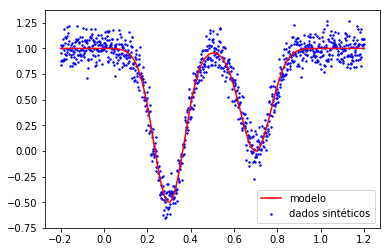

In [6]:
def dm(A, t, t1, s1, B, t2, s2): return 1 - A*np.exp(-(t-t1)**2/(s1**2)) - B*np.exp(-(t-t2)**2/s2**2)

T, M = np.linspace(-0.2,1.2,1000), dm(A=1.5, t=np.linspace(-0.2,1.2, 1000), t1=0.3, t2=0.7, B = 1, s1 = 0.1, s2 = 0.10)

R = np.random.normal(M, 0.1) 

plt.scatter(T, R, color='blue', s=2, label='dados sintéticos')
plt.plot(T,M, color='red', label='modelo')
plt.legend()
plt.show()

# Monte Carlo

## Cálculo de $\pi$

[3.144, 3.1204, 3.1396, 3.140484, 3.1414368]


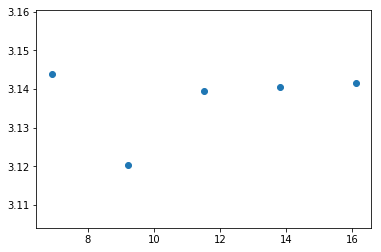

In [8]:
n = [1000, 10000, 100000, 1000000, 10000000]

def pi(n):
    Area_quadrado = 1/4
    R = 1
    x_sample = np.random.uniform(0,1, n)
    y_sample = np.random.uniform(0,1, n)

    def n_dentro(x, y):
        R = 1
        n_int = 0
        y_calc = np.sqrt(R**2 - x**2)
        if x > 0 and x <= 1:
            if y < y_calc:
                n_int = 1
        return n_int

    n_int = sum(list(map(n_dentro, x_sample, y_sample)))

    Area_quadrante = n_int/len(x_sample)

    pi = (4*Area_quadrante)/(R**2)
    return pi

resposta = [pi(i) for i in n]
print(resposta)
plt.scatter(np.log(n), resposta)
plt.show()

## Cálculo de $\int\limits_0^4 \dfrac{1}{x^2 + 1}\, dx$

[1.32, 1.3664, 1.3128, 1.3232, 1.326396, 1.3268516]


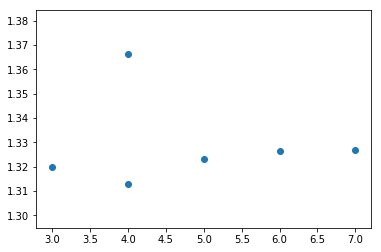

In [7]:
n = [1000, 10000, 10000, 100000, 1000000, 10000000]

def integral(n):
    x_min = 0
    x_max = 4

    y_max = 1

    x_sample = np.random.uniform(x_min,x_max, n)
    y_sample = np.random.uniform(0,y_max, n)


    def n_dentro(x, y):
        y_calc = 1/(x**2 + 1)
        n_int = 0
        if y < y_calc:
            n_int = 1
        return n_int

    n_int = sum(list(map(n_dentro, x_sample, y_sample)))

    I = (x_max-x_min)*y_max*n_int/len(x_sample)
    return I

resposta = [integral(i) for i in n]
print(resposta)
plt.scatter(np.log10(n), resposta)
plt.show()